In [36]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
print("Set up!")

Set up!


In [62]:
n = 9
lamb = 568.4e-6
l=0.5
l_err=5e-4
g=9.8155

In [38]:
data = pd.read_csv("../data/data.csv")
data.index += 1
#data=data.transpose()
data

,1037.988,1375.988,1857.988,2319.688,2820.588
1,133.80,154.2,176.4,196.3,217.9
2,217.07,309.0,355.7,393.3,436.1
3,408.00,464.0,533.2,589.9,654.5
4,544.50,619.3,711.7,786.7,872.8
5,683.00,774.2,890.3,983.6,1091.7
6,820.10,931.0,1069.3,1181.1,1310.2
7,956.70,1088.7,1248.7,1379.8,1530.1
8,1096.30,1244.8,1429.3,1578.6,1750.2
9,1239.60,1404.3,1610.7,1778.2,1971.5


In [39]:
from math import sqrt
def mnk(xs, ys):
    n = len(xs)
    xm = xs.mean()
    ym = ys.mean()
    xym = (xs*ys).mean()
    xxm = (xs*xs).mean()
    yym = (ys*ys).mean()
    dxy = xym - xm*ym
    dxx = ((xs-xm)**2).mean()
    dyy = ((ys-ym)**2).mean()
    
    k = dxy/dxx
    b = ym - k*xm
    k_err = sqrt(1/(n-2)*(dyy/dxx-k**2))
    b_err = k_err*sqrt((xs*xs).mean())
    
    return k, b, k_err, b_err

In [55]:
data["1037.988"][2] = data["1037.988"][1] * 2
kbs = list([mnk(data.index.to_series(), data[str(data.transpose().index[i])]) for i in range(5)])
kbs

[(138.03833333333344,
  -6.902777777778283,
  0.30063711007195026,
  1.6917795202566364),
 (156.14833333333323,
  -4.13055555555502,
  0.24644482732253556,
  1.3868225104933538),
 (179.11000000000013,
  -3.850000000000591,
  0.1969650681934081,
  1.1083843524700296),
 (197.62833333333342,
  -2.863888888889278,
  0.1994479815641594,
  1.1223564864830367),
 (219.0883333333334,
  -2.6638888888892325,
  0.18012818773947684,
  1.0136379336724528)]

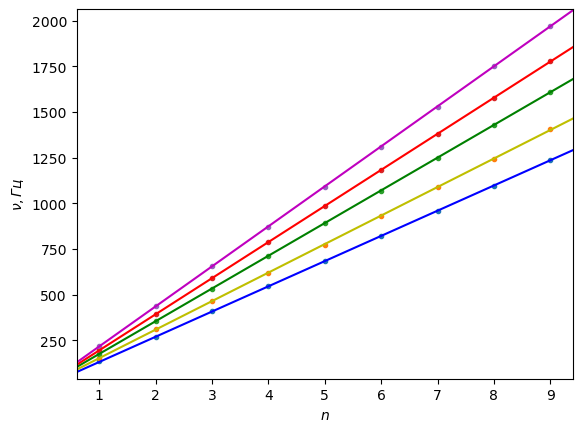

In [57]:
plt.plot(data, '.')
for (k, b, k_err, b_err), color in zip(kbs, ['b', 'y', 'g', 'r', 'm']):
    plt.axline((1, b+k), (9,9*k+b), color=color)
plt.xlabel('$n$')
plt.ylabel('$\\nu, Гц$')
plt.savefig("../img/plt1")

In [58]:
us = [(2*l*k, 2*(l_err*k + l*k_err)) for k, b, k_err, b_err in kbs]
us

[(138.03833333333344, 0.43867544340528375),
 (156.14833333333323, 0.4025931606558688),
 (179.11000000000013, 0.3760750681934082),
 (197.62833333333342, 0.39707631489749284),
 (219.0883333333334, 0.39921652107281025)]

In [70]:
k, b, k_err, b_err = mnk(pd.Series(data.transpose().index, dtype='float')/1000*g, pd.Series(list([u**2 for u, err in us])))
k, b, k_err, b_err

(1641.0314292720186, 2193.1723257682243, 26.450866306911234, 516.1261418155012)

In [71]:
xs = pd.Series(data.transpose().index, dtype='float')/1000*g
ys = pd.Series(list([u**2 for u, err in us]))
xym = sum(xs*ys)
xxm = sum(xs*xs)
kkk = xym/xxm
kkk

1747.464418649691

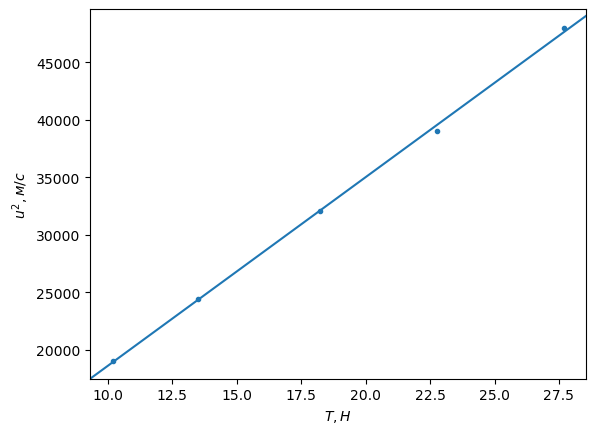

In [72]:
plt.errorbar(pd.Series(data.transpose().index, dtype='float')/1000*g, [u**2 for u, err in us],
            [2*u*err for u, err in us], [0 for u, err in us], '.')
plt.axline((15, (b+15*k)), (20, (b+20*k)))
plt.ylabel("$u^2, м/с$")
plt.xlabel("$T, Н$")
plt.savefig("../img/plt2")

In [73]:
1/k

0.000609372850612381